# Physics 420/580 Final Exam 
## December 19, 2017 2pm-5pm

Do three of the four following problems.  If you attempt all four, your best three will be used for your mark.  Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!)  Marks will be given based on how clearly you demonstrate your understanding.    

There are no restrictions on downloading from the internet, eclass,  or the use of books, notes, or any other widely available computing resources.  However, **you are not allowed** to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  

When you are finished, upload the jupyter notebook to eclass. Eclass times out after 5:05 so make sure that you upload things before then.  Also be careful to save the notebook periodically and that you upload your exam file.


# Monte Carlo

Write a Monte Carlo that calculates that simulates a game in which a person throws a pair of dice 1000 times.  Histogram the outcomes (ie. the sum of the two dice) for one game.  Define the "streak length" by the largest number of consecutive throws where the number thrown doesn't decrease.  For example, if somewhere in the sequence you threw 2,4,5,7,7,11  (one after the other) that would be a streak of length 6. Repeat the game 500 times (rolling the dice 1000 times inside each game), and plot the distribution of maximum streak lengths.

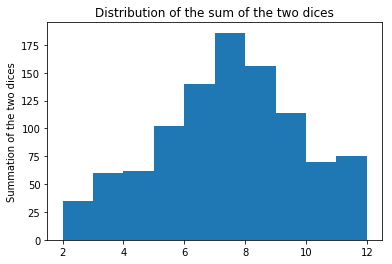

In [1]:
import numpy as np
import matplotlib.pyplot as plt

output1 = np.array([])   
output2 = np.array([])   

for i in np.arange(1000):
    dice1 = np.random.randint(1,7)   ### Random number between 1 and 6 (it should include 6)
    dice2 = np.random.randint(1,7)
    
    output1 = np.append(output1, dice1)
    output2 = np.append(output2, dice2)
    
Sum = output1 + output2
    
plt.figure()
plt.hist(Sum,10)
plt.title('Distribution of the sum of the two dices')
plt.ylabel('Summation of the two dices')
plt.show()


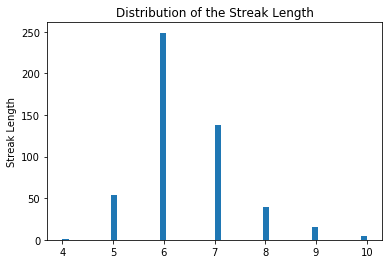

In [2]:
maximumLength = np.array([])

for i in np.arange(500):
    
    gauge = -1
    
    differentLengths = np.array([])
    length = 0
    
    for j in np.arange(1000):
        
        dice1 = np.random.randint(1,7)
        dice2 = np.random.randint(1,7)
        
        Sum1and2 = dice1 + dice2
        
        if(Sum1and2 >= gauge):
            gauge = Sum1and2
            length = length + 1
        else:
            gauge = -1
            differentLengths = np.append(differentLengths, length)
            length = 0
    
    
    StreakLength = np.max(differentLengths)
    maximumLength = np.append(maximumLength, StreakLength)
    
plt.figure()
plt.hist(maximumLength, 50)
plt.title('Distribution of the Streak Length')
plt.ylabel('Streak Length')
plt.show()
            
            
            
    

# Fitting

Download any one of the datasets in the "Final Exam Data Sets" folder on eclass- they have names like DataSet####.npy.  The data sets are npy arrays, which can be read in with the np.load command and consists of one dimensional data (x-values) that have been thrown according to a distribution.    

Histogram and plot the data using 100 bins.  Make the title of the histogram include the name of the dataset.
Make an array y that contains the histogram values (counts per bin).
Make a corresponding array of the central x-value for each bin.is

In [7]:
import numpy as np
import matplotlib.pyplot as plt

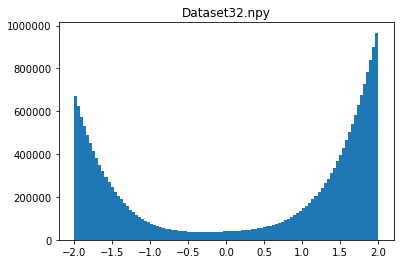

In [8]:
x=np.load('Dataset32.npy')

plt.figure()
plt.hist(x, 100)
plt.title('Dataset32.npy')
plt.show()

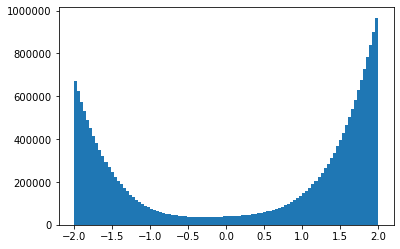

In [9]:
y = plt.hist(x,100)[0]

In [10]:
y.reshape(-1)

array([672314., 622991., 574839., 531807., 490553., 452922., 416021.,
       382059., 351196., 323327., 295095., 269473., 247250., 225314.,
       206498., 189035., 171211., 155598., 141001., 129299., 117679.,
       107704.,  98015.,  89741.,  81999.,  75448.,  68889.,  64581.,
        59390.,  55311.,  51850.,  48436.,  46311.,  44066.,  42475.,
        40978.,  39673.,  38194.,  37947.,  37344.,  36956.,  36523.,
        36485.,  36908.,  36470.,  37177.,  37877.,  38003.,  38361.,
        39204.,  39950.,  40467.,  41438.,  42763.,  43213.,  44332.,
        45826.,  47607.,  49500.,  51267.,  53063.,  56004.,  58823.,
        62397.,  65699.,  69830.,  73908.,  79376.,  85156.,  91636.,
        98840., 106559., 114672., 124401., 134914., 147408., 159421.,
       173443., 188993., 204587., 223081., 242027., 263219., 285426.,
       310242., 336809., 365954., 396219., 429612., 463688., 501379.,
       540334., 582859., 630006., 677556., 728402., 783421., 840843.,
       901848., 9667

In [11]:
bins = 100

a = np.min(x)
b = np.max(x)

rng = (b-a)
binLength = rng/bins

In [12]:
central = np.array([])

for i in np.arange(bins):
    
    center = ((a + i*binLength) + (a + (i+1)*binLength))/2
    central = np.append(central, center)

Write a method using numpy.poly1d to describe a fourth order (five parameter) polynomials.  Use this method to plot \begin{equation} 4x^4+3x^3+2x^2+x+10\end{equation} between -2 and 2.

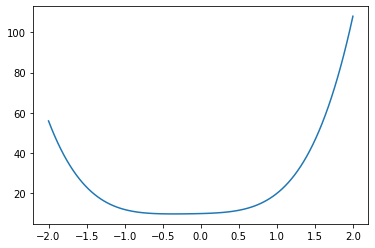

In [13]:
coef = np.array([4, 3, 2, 1, 10])

p = np.poly1d(coef)


xax = np.linspace(-2, 2, 100)
yax = p(xax)

plt.figure()
plt.plot(xax, yax)
plt.show()

Write a method poly5residuals(parameters,*args), where "parameters" is an numpy array that contains the polynomial coefficients, and args will contain three np arrays- x,y,sigma that contain the x values, y values, and uncertainties of the data.  

poly5residuals should return an array of residuals: each element corresponds to a data element and is (polynomial(x)-y)/sigma.  It should ignore any zero values- either delete the corresponding bin values or make the residuals for zero values in the histogram should be zero.

Print out a list of residuals between the polynomial and the histogram (the x values should correspond to the center of each bin).  Sigma should correspond to the uncertainties in the data for a counting experiment of uncorrelated events.  

In [14]:
def poly5residuals(parameters,*args):
    x,y,sigma = args
    A,B,C,D,E = parameters
    
    pol = np.poly1d(parameters)
    return (pol(x)-y)/sigma

In [15]:
Uncertainty = np.sqrt(y)


In [16]:
fitParameters = coef
args = (central, y, Uncertainty)

Res = poly5residuals(fitParameters, *args)

In [17]:
Res

array([-819.88163829, -789.2340087 , -758.11955589, -729.19115715,
       -700.33691122, -672.93864356, -644.94236163, -618.05623046,
       -592.56645144, -568.56851325, -543.17767494, -519.06022152,
       -497.19588912, -474.62692585, -454.37586772, -434.73773569,
       -413.73317811, -394.41624591, -375.45839967, -359.53951186,
       -343.00166201, -328.14091629, -313.0313642 , -299.52574792,
       -286.31204656, -274.63500952, -262.42348412, -254.08401588,
       -243.65591286, -235.13749955, -227.6598661 , -220.03482503,
       -215.1524563 , -209.87088153, -206.04599639, -202.38103215,
       -199.13106391, -195.38232405, -194.74933113, -193.19506356,
       -192.18831243, -191.0584967 , -190.95900044, -192.06332581,
       -190.91960143, -192.76218409, -194.56931303, -194.8927084 ,
       -195.80885928, -197.94959204, -199.82482545, -201.11406392,
       -203.513527  , -206.74289466, -207.82798043, -210.50246125,
       -214.02119049, -218.14173273, -222.43767037, -226.37395

Fit the polynomial to the histogram using scipy.optimize.least_squares.
Plot the histogram with the polynomial overlaid and separately plot the residuals.  

In [19]:
from scipy.optimize import least_squares


args = (central, y, Uncertainty)
startParameters = coef

out = least_squares(poly5residuals,startParameters,args=args,method='lm')
fit=out.x

In [20]:
fit

array([ 44037.63381829,  14743.93242478,  26310.62978413,  16474.02781858,
        39378.27553647])

In [21]:
bestPol = np.poly1d(fit)

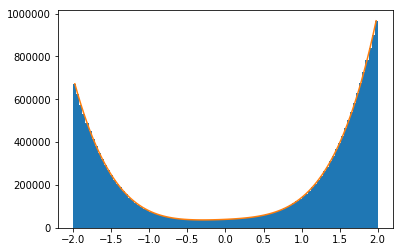

In [22]:
plt.figure()

plt.hist(x,100)
plt.plot(central, bestPol(central))
plt.show()

In [23]:
ResBest = poly5residuals(fit, *args)

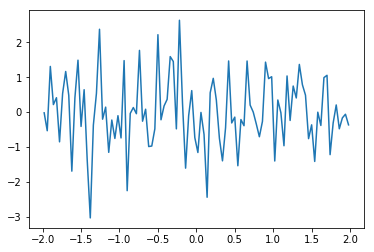

In [24]:
plt.figure()
plt.plot(central, ResBest)
plt.show()

Extract the marginalized uncertainties for each parameter from the fit. 

In [28]:
#to find the single parameter uncertainties, we follow the prescription
hessian=out.jac.transpose().dot(out.jac)
alpha=2*hessian  #since we want the hessian of chisquare, and the fitter used the hessian of the cost function=1/2 chisquare
C=np.linalg.inv(alpha)
unc=np.sqrt(np.diagonal(C))

for a in zip(fit,unc):
    print(a[0],'+/-',a[1])

44037.6338183 +/- 26.9721919407
14743.9324248 +/- 27.6921595327
26310.6297841 +/- 75.9887511948
16474.0278186 +/- 50.3895289032
39378.2755365 +/- 29.936167063


## Differential Equations
The simple electronic circuit below can be described by the three differential equations:
\begin{equation}V_i-i_1R_1-\frac{q_1}{C}=0\end{equation}
\begin{equation}-i_2R_2=-\frac{q_3}{C}=V_o\end{equation}
\begin{equation}i_1-i_2-i_3=0\end{equation}

Where $i_{j}=\frac{dq_{j}}{dt}$ for j=1,2,3; $V_i$ is the input voltage and $V_o$ is the output voltage.Use $R_1=R_2=100000$ ohms and C=25e-9 farad. 

The diagram is just for reference/interest.  You only need the differential equations to do the problems.
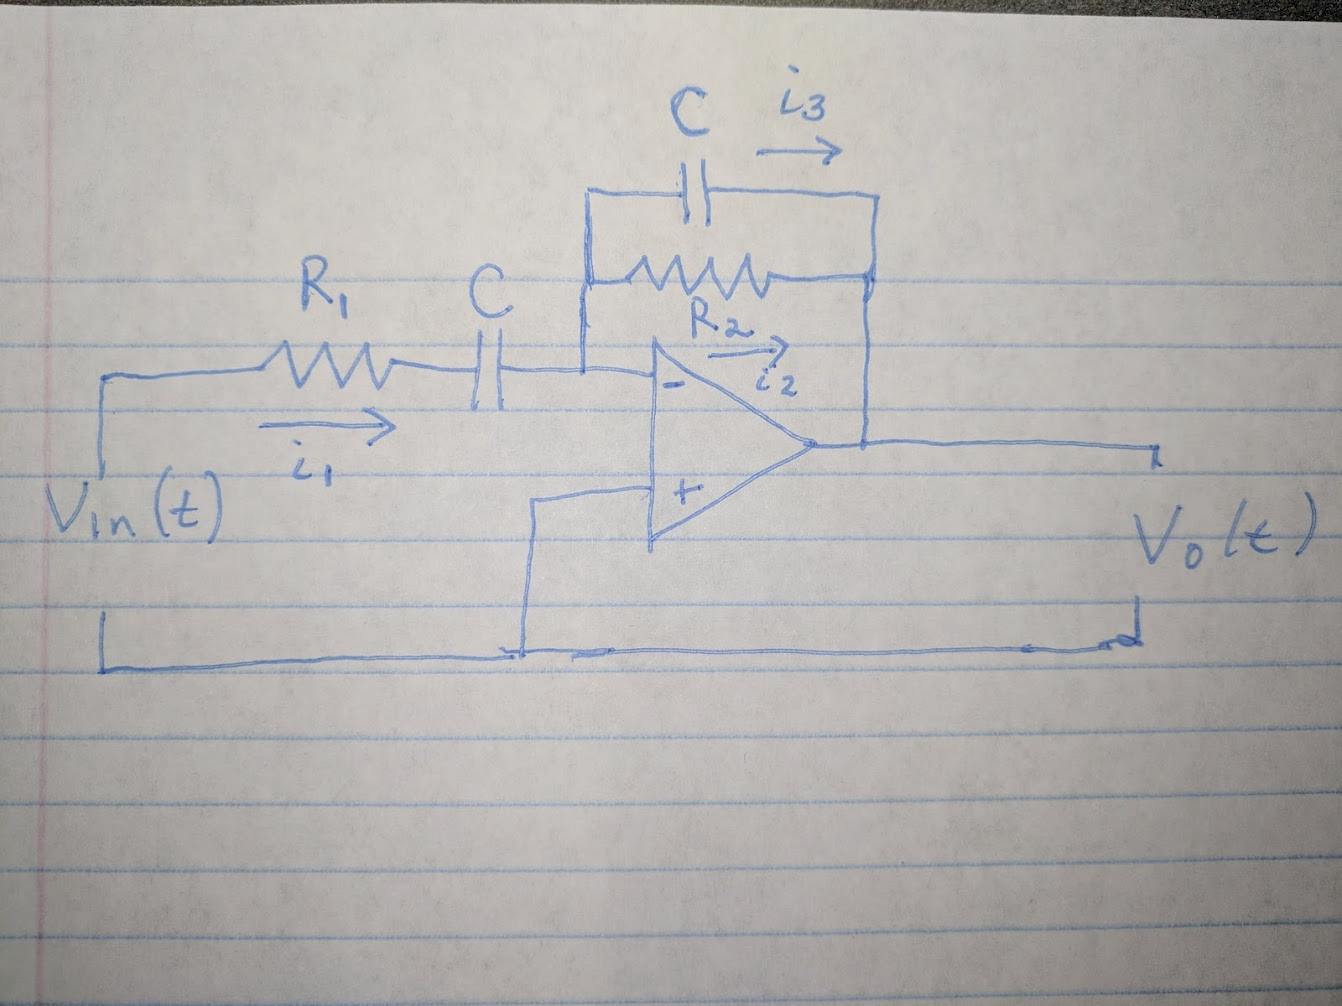



Write a program that solves for the currents, $i_{1,2,3}(t)$ given $q_{1,2,3}(t)$ and a function $V_i(t)$.  


In [20]:
R1 = 100000
R2 = R1
C = 25e-9

v = 1000

def circuit1000(y, t):
    
    q1,q2,q3  = y
    
    dydt = np.array([1/R1*(5*np.sin(2*np.pi*v*t)-q1/C), 1/R2/C*q3, 1/R1*(5*np.sin(2*np.pi*v*t)-q1/C) - 1/R2/C*q3])
    
    return(dydt)


 Suppose $V_i=5\sin\omega t$.  If the frequency $\nu=1000$ Hz, the angular frequency is $\omega=2\pi\nu=2\pi 1000$.  Using odeint, solve the differential equation and plot $V_o(t)$, over 20 periods of oscillation.  Repeat for 100 Hz and 5000 Hz.      

In [21]:
from scipy.integrate import odeint

y0 = np.array([0,0,0])

T = 1/v

t = np.linspace(0, 20*T, 1000)

odesol1000 = odeint(circuit1000, y0, t,rtol=1e-13,atol=1e-13)

VO1000 = -odesol1000[:, 2]/C

In [22]:
R1 = 100000
R2 = R1
C = 25e-9

v = 100

def circuit100(y, t):
    
    q1,q2,q3  = y
    
    dydt = np.array([1/R1*(5*np.sin(2*np.pi*v*t)-q1/C), 1/R2/C*q3, 1/R1*(5*np.sin(2*np.pi*v*t)-q1/C) - 1/R2/C*q3])
    
    return(dydt)

from scipy.integrate import odeint

y0 = np.array([0,0,0])

T = 1/v

t = np.linspace(0, 20*T, 1000)

odesol100 = odeint(circuit100, y0, t,rtol=1e-13,atol=1e-13)

VO100 = -odesol100[:, 2]/C

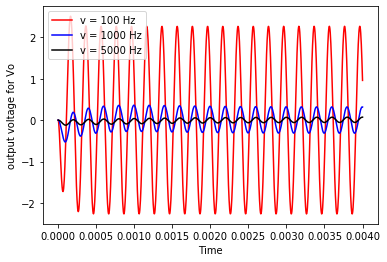

In [23]:
R1 = 100000
R2 = R1
C = 25e-9

v = 5000

def circuit5000(y, t):
    
    q1,q2,q3  = y
    
    dydt = np.array([1/R1*(5*np.sin(2*np.pi*v*t)-q1/C), 1/R2/C*q3, 1/R1*(5*np.sin(2*np.pi*v*t)-q1/C) - 1/R2/C*q3])
    
    return(dydt)

from scipy.integrate import odeint

y0 = np.array([0,0,0])

T = 1/v

t = np.linspace(0, 20*T, 1000)

odesol5000 = odeint(circuit5000, y0, t,rtol=1e-13,atol=1e-13)

VO5000 = -odesol5000[:, 2]/C

plt.figure()
plt.plot(t, VO100, 'r', label='v = 100 Hz')
plt.plot(t, VO1000, 'b', label='v = 1000 Hz')
plt.plot(t, VO5000, 'k', label='v = 5000 Hz')
plt.xlabel('Time')
plt.ylabel('output voltage for Vo')
plt.legend()
plt.show()

Plot the amplitude of $V_o$ as a function of $\omega$ for frequencies from 10 Hz to 10 kHz.

In [ ]:
v = np.logspace(1,4, 1000)

Amp = np.array([])

for i in v:
    
    def circuit1(y, t):
    
        q1,q2,q3  = y
    
        dydt = np.array([1/R1*(5*np.sin(2*np.pi*i*t)-q1/C), 1/R2/C*q3, 1/R1*(5*np.sin(2*np.pi*i*t)-q1/C) - 1/R2/C*q3])
    
        return(dydt)
    
    y0 = np.array([0,0,0])

    T = 1/i

    t = np.linspace(0, 4*T, 1000)

    odesol = odeint(circuit1, y0, t,rtol=1e-13,atol=1e-13)

    VO = -odesol[:, 2]/C
    
    Amp = np.append(Amp, (-np.min(VO)+np.max(VO))/2)
    
plt.figure()
plt.plot(2*np.pi*v, Amp)
plt.xlabel('Omega')
plt.xscale('log')
plt.ylabel('Amplitude of VO')
plt.show()

## Geometry and Monte Carlo
Using Monte Carlo, calculate the volume of an object made by molding 3 10 cm diameter cylinders together, so that the angle between any two axes is 60 degrees, and trimming the cylinders at +/- 30 cm with respect to each cylinder axis.
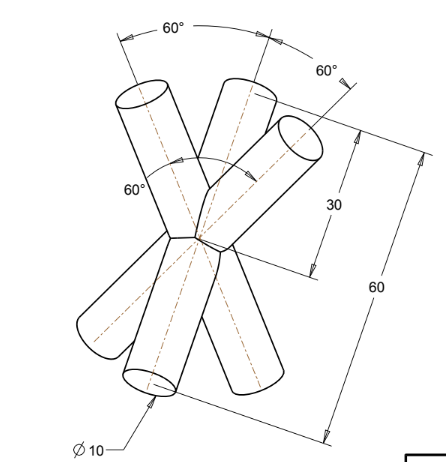


We have three axes at phi=0,120,240 degrees.

We write their directions as three unit vectors $(\sin\theta \cos\phi_i, \sin\theta\sin\phi_i,\cos\theta_i)$
The dot product between two of them is $\cos(\pi/3)$, so, if we take the dot product between $\phi=0$ and $\phi=2\pi/3$:
\begin{equation}
\sin^2\theta \cos(2\pi/3)+\cos^2\theta=\cos(\pi/3)\rightarrow \sin\theta=\sqrt{\frac{1-\cos(\pi/3)}{1-\cos(2\pi/3)}}
\end{equation}

Start by finding theta and checking that the dot products work.  

In [71]:
print(np.cos(np.pi/3))
theta=np.arcsin(np.sqrt((1-np.cos(np.pi/3))/(1-np.cos(2*np.pi/3))))
directions=[]
for phi in np.arange(0,2*np.pi,2*np.pi/3):
    print(phi/np.pi*180)
    n=np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    directions.append(n)
print('check of dot products.  theta=',theta,np.dot(directions[0],directions[1]),np.dot(directions[1],directions[2]),np.dot(directions[0],directions[2]))

0.5
0.0
120.0
240.0
check of dot products.  theta= 0.61547970867 0.5 0.5 0.5


Now we use the fact that a vector to a random point $\vec{x}$ and normal to the axis $\hat{n}$  is \begin{equation}\vec{d}=\vec{x}-(\vec{x}\cdot\hat{n})\hat{n},\end{equation} and the distance along the axis is just $x_n=\vec{x}\cdot\hat{n}.$

So we will generate a large number of points uniformly within a volume 100x100x100 cm (too large, but that is fine).  If a point is within 5 cm of any axis, and $x_n$ for that axis is within -30 and 30, the point is inside the structure.  The volume will be \begin{equation}V=\frac{\text{Number of points inside the structure}}{\text{Number of points thrown}}\text{(Volume of box)}\end{equation}

In [85]:
N=1000000 #number of points to throw
side=100
points=np.random.rand(N,3)*side-side/2
ninside=0
for p in points:
    for nx in directions:
        xn=np.dot(p,nx)
        if -30<=xn<=30:
            d=p-xn*nx
            mag=np.sqrt(np.dot(d,d))
            if mag<5:
                ninside=ninside+1
                #print(p,xn,mag,d)
                break
print('volume=',side**3*ninside/N, 'ninside=',ninside)

vcalc=3*np.pi*5**2*60
print('vcalc (ignoring intersections)=',vcalc)

volume= 12520.0 ninside= 12520
vcalc (ignoring intersections)= 14137.166941154068


When you are finished, upload your completed exam onto eClass.  